In [33]:
!pip install pyswarm
!pip install torchswarm
!pip install pyswarms
!pip install -U scikit-multiflow

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tensorflow as tf
import math
import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable 
from pyswarm import pso
from pyswarms.utils.functions import single_obj as fx
from torchswarm.swarmoptimizer import SwarmOptimizer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from pyswarm import pso
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from skmultiflow.drift_detection.adwin import ADWIN
from sklearn.metrics import classification_report, accuracy_score  

In [42]:
df=pd.read_csv('../input/creditcardfraud/creditcard.csv')
df_time=df['Time']

df_fraud=df['Class']


dtime=np.array(df_time)
np.where(dtime==86400)


(array([144786]),)

In [43]:
one_dat=df_fraud[:144786]
one_dat.shape

(144786,)

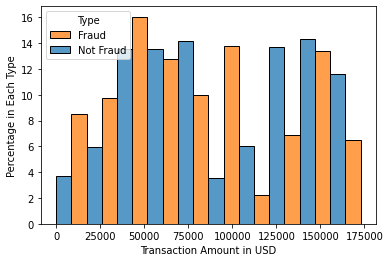

In [24]:

ax=sns.histplot(x='Time',data=df,hue='Class',stat='percent',multiple='dodge',common_norm=False,bins=10)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [44]:
adwin = ADWIN()

previous_variance = 0
for i in range(144786):
    adwin.add_element(one_dat[i])
    if adwin.detected_change():
        print("Change detected in value {}, at index {}".format(one_dat[i], i))
        print("Current variance: {}. Previous variance {}".format(adwin.variance, previous_variance))
    previous_variance = adwin.variance

Change detected in value 0, at index 22527
Current variance: 0.004644923739963083. Previous variance 0.003803066669749415
Change detected in value 0, at index 34239
Current variance: 0.003928588025623077. Previous variance 0.0034057534644175436
Change detected in value 0, at index 36959
Current variance: 0.004141539084224669. Previous variance 0.0035580330709678344


In [17]:
df_time[22527]/(60*60)

8.969722222222222

In [44]:

df_select=df.drop(['Class'],axis=1)
#df_select=df.drop(['Time'],axis=1)
features=np.array(df_select)
label=np.array(df_fraud)

In [45]:
oversample = SMOTE()
X_r, y = oversample.fit_resample(features, label)
# summarize the new class distribution
counter = Counter(y)
print(counter)
for label, _ in counter.items():
    row_ix = where(y == label)[0]

X_r2 = StandardScaler().fit_transform(X_r)
X_r2


Counter({0: 284315, 1: 284315})


array([[-1.82421997,  0.20486348, -0.54629308, ...,  0.05427662,
        -0.14818847,  0.24447011],
       [-1.82421997,  0.67221957, -0.45306618, ..., -0.0951712 ,
        -0.06267253, -0.42192309],
       [-1.82419918,  0.20512962, -0.89490025, ..., -0.14378758,
        -0.24068764,  1.28326886],
       ...,
       [ 0.07800834,  0.70789864, -0.03352916, ...,  0.01862214,
         0.18864954, -0.33453754],
       [-1.07504029, -0.40258072,  0.8531015 , ...,  0.52412001,
         0.79997587, -0.14415639],
       [ 0.06848505,  0.1124356 , -0.08832892, ...,  0.28944611,
         0.06979069, -0.26078536]])

In [8]:
rf_sf = RandomForestClassifier() 

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_train.shape[1]

In [10]:
EarlyStopper = EarlyStopping(patience=4, monitor='val_loss', mode='min')
model = Sequential()
model.add(LSTM(11,return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(layers.Flatten())
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
model.compile(loss='MeanSquaredError', optimizer='adam', metrics=["accuracy"])
model.summary()

2022-09-27 02:33:21.507672: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 02:33:21.509000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 02:33:21.509886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 02:33:21.510923: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 11)            572       
_________________________________________________________________
flatten (Flatten)            (None, 330)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 331       
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________


In [46]:
def mind(m):
    l=[]
    for i in range(30):
        if m[i]==1:
            l.append(i)
    return l

In [64]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
classifier = linear_model.LogisticRegression()

def f_per_particlerf(m, alpha):
   
    total_features = X_r2.shape[1]

    
    if np.count_nonzero(m) == 0: 
         X_subset = X_r2
    else:
        l=mind(m)
        X_subset = X_r2[:,l]
   # X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.20, random_state=123)

    scores = cross_val_score(classifier, X_subset, y, cv=3)
    
    
    P = scores.mean()


    particleScore.append(P)
    particleSize.append(X_subset.shape[1])

    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    

    return j
def ff(x, alpha=0.9):

    n_particles = x.shape[0]
    j = [f_per_particlerf(x[i], alpha) for i in range(n_particles)]

    return np.array(j)

In [15]:
def f_per_particleLSTM(m, alpha):
   
    total_features = X_r2.shape[1]

    
    if np.count_nonzero(m) == 0: 
         X_subset = X_r2
    else:
        l=mind(m)
        X_subset = X_r2[:,l]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.20, random_state=123)

    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    model = Sequential()
    model.add(LSTM(11,return_sequences=True, input_shape = (X_train.shape[1],1)))
    model.add(layers.Flatten())
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    model.fit(X_train, y_train,batch_size=64, verbose=1, workers=8, use_multiprocessing=True)
    P, test_acc = model.evaluate(X_test, y_test, verbose=0)

    particleScore.append(P)
    particleSize.append(X_subset.shape[1])

    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    

    return j
def f(x, alpha=0.9):

    n_particles = x.shape[0]
    j = [f_per_particleLSTM(x[i], alpha) for i in range(n_particles)]

    return np.array(j)

In [50]:
!pip install pyswarms==0.2.0
from pyswarms.utils.environments import PlotEnvironment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 536.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.8/375.8 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.5/824.5 kB 6.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.7/186.7 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
  Created wheel for future: filename=future-0.16.0-py3-none-any.whl size=487808 sha256=2a21102c9cd34b4aaaf7eebe19ec12b1f2e7e798360622becee1f8977bda65b6
  Stored in directory: /root/.cache/pip/wheels/7c/09/6f/dfd31fb2ebe951aefbee461a0dfce1bdc2e4b2c1016e85d233
  Created wheel for PyYAML: filename=PyYAML-3.12-cp37-cp37m-linux_x86_64.whl size=43073 sha256=5473b7bd34dd0748b1e2eb121e2b25f9b0fb65a0f541dafa92ce5876c84f3b4e
  Stored in directory: /root/.cache/pip/wheels/21/cc/0a/8f691c938b07

In [65]:
from datetime import datetime as dt
import time
from pyswarms.single import GlobalBestPSO
from pyswarms.discrete import BinaryPSO
from sklearn.model_selection import cross_val_score

start = dt.now()
print("Started at: ", str(start))
particleScore = list()
particleSize = list()
options = {'c1': 2, 'c2': 2, 'w':0.3, 'k': 1, 'p':2}


dimensions = X_r2.shape[1] 

optimizer =BinaryPSO(n_particles=2, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(ff,iters=5, verbose=2)
print(cost,pos)

2022-09-27 03:53:41,575 - pyswarms.discrete.binary - INFO - Optimize for 5 iters with {'c1': 2, 'c2': 2, 'w': 0.3, 'k': 1, 'p': 2}


Started at:  2022-09-27 03:53:41.567765


pyswarms.discrete.binary: 100%|██████████|5/5, best_cost=0.0656
2022-09-27 03:54:51,887 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.06564995785771632, best pos: [0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]


0.06564995785771632 [0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]


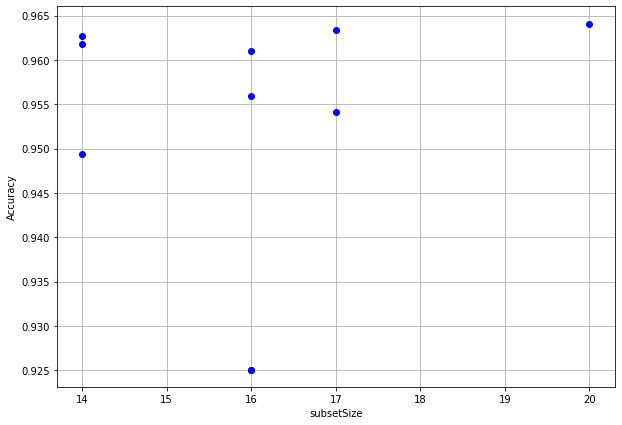

In [66]:
import matplotlib.pyplot as plt #MatPlotLib usado para desenhar o gráfico criado com o NetworkX

#iterations = list(range(1,len(optimizer.get_cost_history)+1))
plt.figure(figsize=(10,7))
#plt.xlabel('2^i classes')
plt.xlabel('subsetSize')
plt.ylabel('Accuracy')
plt.plot(particleSize, particleScore, 'bo')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)


#plt.savefig("D:/USP/2018-1/Computação Bioinspirada/Trabalhos/iterationVSerrorRate2.png", format="PNG")


plt.show()

In [31]:
from datetime import datetime as dt
import time
from pyswarms.single import GlobalBestPSO
from pyswarms.discrete import BinaryPSO


start = dt.now()
print("Started at: ", str(start))
particleScore = list()
particleSize = list()
options = {'c1': 2, 'c2': 2, 'w':0.3, 'k': 1, 'p':2}


dimensions = X_r2.shape[1] 

optimizer =BinaryPSO(n_particles=2, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f,iters=5, verbose=2)



2022-09-27 03:08:22,146 - pyswarms.discrete.binary - INFO - Optimize for 5 iters with {'c1': 2, 'c2': 2, 'w': 0.3, 'k': 1, 'p': 2}


Started at:  2022-09-27 03:08:22.137173


pyswarms.discrete.binary:   0%|          |0/5

7108/7108 [==============================] - 28s 4ms/step - loss: 0.0972 - accuracy: 0.9659


pyswarms.discrete.binary:  20%|██        |1/5, best_cost=0.864

7108/7108 [==============================] - 27s 4ms/step - loss: 0.1415 - accuracy: 0.9487


pyswarms.discrete.binary:  40%|████      |2/5, best_cost=0.858

7108/7108 [==============================] - 27s 4ms/step - loss: 0.2476 - accuracy: 0.9045


pyswarms.discrete.binary:  60%|██████    |3/5, best_cost=0.805

7108/7108 [==============================] - 28s 4ms/step - loss: 0.1246 - accuracy: 0.9575


pyswarms.discrete.binary:  80%|████████  |4/5, best_cost=0.805

7108/7108 [==============================] - 27s 4ms/step - loss: 0.1380 - accuracy: 0.9487


pyswarms.discrete.binary: 100%|██████████|5/5, best_cost=0.805
2022-09-27 03:14:56,101 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.8054415859778723, best pos: [1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0]


In [19]:
#history = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1,validation_data=(X_test, y_test), callbacks=[EarlyStopper])
pos

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1])

In [17]:
m=[1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0]
l=[]

for i in range(30):
    if pos[i]==1:
        l.append(i)

X_r2[:,l]

array([[ 0.20496202,  0.31144899,  0.69559195, ..., -0.10294669,
        -0.48655863, -0.14843958],
       [ 0.67351833,  0.40773234,  0.37591389, ...,  0.10670387,
         0.21699558, -0.06296365],
       [ 0.20522884,  0.27159608,  1.48084395, ...,  0.90677072,
        -0.37484587, -0.24089546],
       ...,
       [ 0.21858861, -0.20529105,  0.36006673, ...,  0.23669029,
         1.43127899,  0.0948538 ],
       [ 0.12230994,  0.02474451, -0.64457688, ...,  0.59762456,
         1.62986524,  0.26581712],
       [-4.00274811, -3.66360898, -0.47146376, ...,  0.72061764,
        -1.95490433, -2.90774128]])

X_train, X_test, y_train, y_test = train_test_split(X_r2[:,l], y, test_size=0.20, random_state=None)
# Perform classification and store performance in P
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
model = Sequential()
model.add(LSTM(11,return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(layers.Flatten())
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train,batch_size=64, verbose=1, workers=8, use_multiprocessing=True)
P, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy:{test_acc} Test Loss: {P}")

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train_Accuracy:{train_acc} Train Loss: {train_loss}")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy:{test_acc} Test Loss: {test_loss}")
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

****

'''
    if x[1]< 0.003:
        learning_rate = 0.001
    elif x[1]< 0.0075:
        learning_rate = 0.005
    elif x[1]< 0.015:
        learning_rate = 0.01
    elif x[1]< 0.035:
        learning_rate = 0.02
    elif x[1]< 0.075:
        learning_rate = 0.05
    elif x[1]< 0.125:
        learning_rate = 0.1
    elif x[1]< 0.175:
        learning_rate = 0.15
    else:
        learning_rate = 0.2
'''

In [19]:
from tensorflow.keras import backend as K
X_train, X_test, y_train, y_test = train_test_split(X_r2[:,l], y, test_size=0.20, random_state=None)
# Perform classification and store performance in P
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
def model_design(x): 
  
    #print(f"Units : {int(x[0])}, Learning Rate : {x[2]:.2f}")
    K.clear_session()
    input_dim = X_train.shape[1]

    model = Sequential()
    model.add(LSTM(int(x[0]),return_sequences=True, input_shape = (X_train.shape[1], 1)))
    model.add(layers.Flatten())
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    if x[1]< 0.003:
        learning_rate = 0.001
    elif x[1]< 0.0075:
        learning_rate = 0.005
    elif x[1]< 0.015:
        learning_rate = 0.01
    elif x[1]< 0.035:
        learning_rate = 0.02
    elif x[1]< 0.075:
        learning_rate = 0.05
    elif x[1]< 0.125:
        learning_rate = 0.1
    elif x[1]< 0.175:
        learning_rate = 0.15
    else:
        learning_rate = 0.2
    print(f"Units : {int(x[0])}, Learning Rate : {learning_rate:.2f}")
    
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='MeanSquaredError', optimizer=opt, metrics=["accuracy"])
    return model

In [23]:
EarlyStopper = EarlyStopping(patience=4, monitor='val_loss', mode='min')
count = 0
def best_model(x):
    print(x)
    model = model_design(x)

    history = model.fit(X_train, y_train, epochs=2, batch_size=x[2], verbose=1, validation_data=(X_test, y_test),callbacks=[EarlyStopper], workers=8, use_multiprocessing=True)

    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    print(f"Train_Accuracy:{train_acc} Train Loss: {train_loss}")

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy:{test_acc} Test Loss: {test_loss}")
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    print(classification_report(y_test, y_pred))
    matrix = confusion_matrix(y_test, y_pred)
    return test_loss


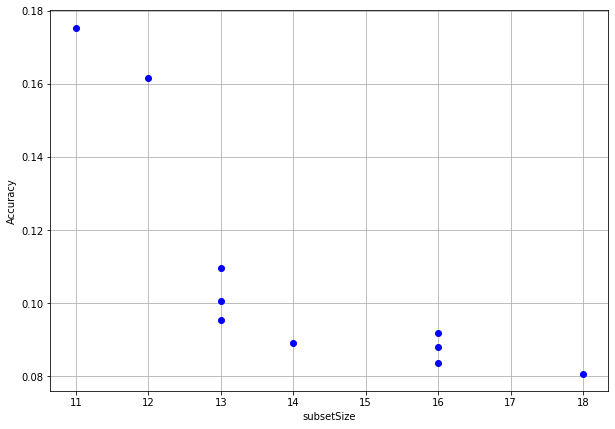

In [32]:
import matplotlib.pyplot as plt #MatPlotLib usado para desenhar o gráfico criado com o NetworkX

#iterations = list(range(1,len(optimizer.get_cost_history)+1))
plt.figure(figsize=(10,7))
#plt.xlabel('2^i classes')
plt.xlabel('subsetSize')
plt.ylabel('Accuracy')
plt.plot(particleSize, particleScore, 'bo')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)


#plt.savefig("D:/USP/2018-1/Computação Bioinspirada/Trabalhos/iterationVSerrorRate2.png", format="PNG")


plt.show()

In [25]:
lb=[20,0.01,32]
ub=[50,0.02,128]
xopt, fopt = pso(best_model, lb, ub)
print ("Best position"+str(xopt))
print ("Loss:" + str(fopt))

[3.96706844e+01 1.56084347e-02 6.80859826e+01]
Units : 39, Learning Rate : 0.02
Epoch 1/2
7108/7108 [==============================] - 30s 4ms/step - loss: 0.0156 - accuracy: 0.9802 - val_loss: 0.0067 - val_accuracy: 0.9914
Epoch 2/2
7108/7108 [==============================] - 28s 4ms/step - loss: 0.0068 - accuracy: 0.9913 - val_loss: 0.0056 - val_accuracy: 0.9928
Train_Accuracy:0.9932073354721069 Train Loss: 0.005314441863447428
Test Accuracy:0.99283367395401 Test Loss: 0.005647546146064997


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67     57086
           1       0.00      0.00      0.00     56640

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.34    113726

[4.28244915e+01 1.42279450e-02 8.73754299e+01]
Units : 42, Learning Rate : 0.01
Epoch 1/2
7108/7108 [==============================] - 31s 4ms/step - loss: 0.0158 - accuracy: 0.9801 - val_loss: 0.0079 - val_accuracy: 0.9900
Epoch 2/2
7108/7108 [==============================] - 29s 4ms/step - loss: 0.0051 - accuracy: 0.9935 - val_loss: 0.0043 - val_accuracy: 0.9947
Train_Accuracy:0.9947966933250427 Train Loss: 0.0041895899921655655
Test Accuracy:0.9946714043617249 Test Loss: 0.004328122362494469


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67     57086
           1       0.00      0.00      0.00     56640

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.34    113726

[3.82887676e+01 1.68362684e-02 6.35578416e+01]
Units : 38, Learning Rate : 0.02
Epoch 1/2
7108/7108 [==============================] - 41s 4ms/step - loss: 0.0155 - accuracy: 0.9805 - val_loss: 0.0058 - val_accuracy: 0.9926
Epoch 2/2
7108/7108 [==============================] - 31s 4ms/step - loss: 0.0080 - accuracy: 0.9899 - val_loss: 0.0054 - val_accuracy: 0.9933
Train_Accuracy:0.9931875467300415 Train Loss: 0.005535073112696409
Test Accuracy:0.993290901184082 Test Loss: 0.005409397650510073


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67     57086
           1       0.00      0.00      0.00     56640

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.34    113726

[2.63390458e+01 1.19704046e-02 5.69739138e+01]
Units : 26, Learning Rate : 0.01
Epoch 1/2
7108/7108 [==============================] - 31s 4ms/step - loss: 0.0159 - accuracy: 0.9798 - val_loss: 0.0081 - val_accuracy: 0.9898
Epoch 2/2
1438/7108 [=====>........................] - ETA: 19s - loss: 0.0067 - accuracy: 0.9916

KeyboardInterrupt: 

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X_r2[:,l], y, test_size=0.20, random_state=None)
# Perform classification and store performance in P
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
model = Sequential()
model.add(LSTM(28,return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(layers.Flatten())
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train,batch_size=64, verbose=1, workers=8, use_multiprocessing=True)
P, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy:{test_acc} Test Loss: {P}")
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
print(classification_report(y_test, y_pred))

NameError: name 'train_test_split' is not defined